In [116]:
import cv2         
import numpy as np   
import matplotlib.pyplot as plt

In [117]:
def turnGrayscale(image_path):    
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.imshow(img_gray , cmap='gray')
    plt.show()
    return img_gray

In [118]:
def medianFilter(image):
    img_blur = cv2.blur(image, (1, 17))
    img_filtered = cv2.medianBlur(img_blur, 5)

    if len(img_filtered.shape) == 3:
        img_filtered = cv2.cvtColor(img_filtered, cv2.COLOR_BGR2GRAY)

    img_filtered = np.uint8(np.clip(img_filtered, 0, 255))

    _, img_thresh = cv2.threshold(img_filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.imshow(img_thresh, cmap='gray')
    plt.show()

    return img_thresh

In [119]:
def histogramStretching(image):
    min = np.min(image)
    max = np.max(image)
    image = np.uint8((image - min) / (max - min) * 255)
    return image

In [120]:
def rotateBarcode(image):

    edges = cv2.Canny(image, 50, 150)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        largest_contour = max(contours, key=cv2.contourArea)

        rect = cv2.minAreaRect(largest_contour)
        box = cv2.boxPoints(rect)
        box = np.int32(box)

        angle = rect[-1]
        if angle < -45:
            angle -= 90

        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        img_rotated = cv2.warpAffine(image, rotation_matrix, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

        box = np.int32(cv2.transform(np.array([box]), rotation_matrix)[0])
        x, y, h, w = cv2.boundingRect(box)

        if h > w:
            img_rotated = cv2.rotate(img_rotated, cv2.ROTATE_90_CLOCKWISE)
    
    plt.imshow(img_rotated , cmap='gray')
    plt.show()

    return img_rotated

In [121]:
def extractBarcode(image):
    img_thresh_inv = cv2.bitwise_not(image)

    x, y, w, h = cv2.boundingRect(img_thresh_inv)

    barcode = image[y:y+h-h//4, x:x+w]
    plt.imshow(barcode, cmap='gray')
    plt.show()
    return barcode


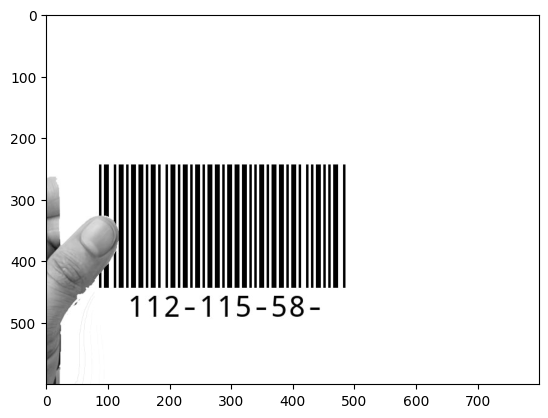

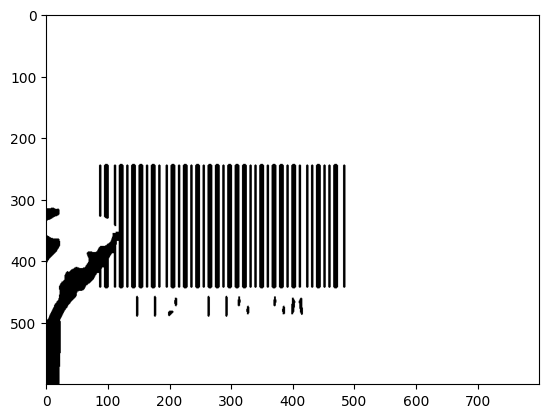

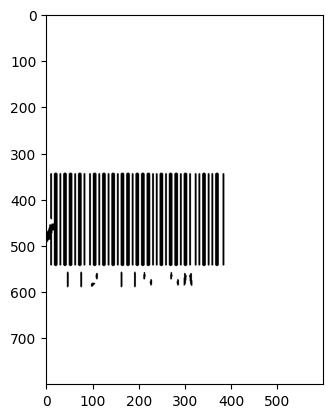

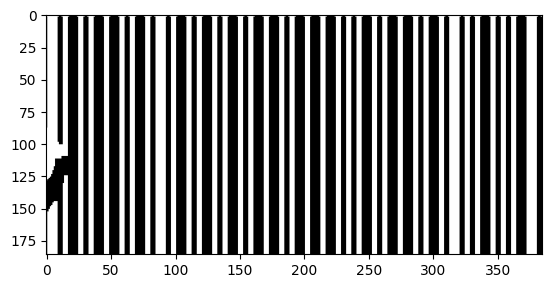

In [122]:
# Logic not complete and not tested for all 
# cases but this is the general idea

image = turnGrayscale('Test Cases/03 - eda ya3am ew3a soba3ak mathazarsh.jpg')

image = histogramStretching(image)

image = medianFilter(image)

image = rotateBarcode(image)

image = extractBarcode(image)
